In [207]:
import pandas as pd
import numpy as np
import os

In [208]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sajkazmi/premier-league-matches")

print("Path to dataset files:", path)

Path to dataset files: /Users/samson/.cache/kagglehub/datasets/sajkazmi/premier-league-matches/versions/1


In [263]:
# Assuming the CSV file is named 'matches.csv' within the directory
csv_file_path = os.path.join(path, 'matches.csv')
df = pd.read_csv(csv_file_path)

In [264]:
display(df)

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,0,2020-09-21,20:15 (21:15),Premier League,Matchweek 2,Mon,Away,W,3,1,...,Match Report,NaN,13,8,21.1,2,1,1,2024,Manchester City
1,2,2020-09-27,16:30 (17:30),Premier League,Matchweek 3,Sun,Home,L,2,5,...,Match Report,NaN,16,5,19.8,1,0,0,2024,Manchester City
2,4,2020-10-03,17:30 (18:30),Premier League,Matchweek 4,Sat,Away,D,1,1,...,Match Report,NaN,23,1,18.2,1,0,0,2024,Manchester City
3,5,2020-10-17,17:30 (18:30),Premier League,Matchweek 5,Sat,Home,W,1,0,...,Match Report,NaN,13,5,17.7,0,0,0,2024,Manchester City
4,7,2020-10-24,12:30 (13:30),Premier League,Matchweek 6,Sat,Away,D,1,1,...,Match Report,NaN,14,7,20.9,1,0,0,2024,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,87,2020-07-07,18:00 (19:00),Premier League,Matchweek 34,Tue,Away,L,1,2,...,Match Report,NaN,12,3,16.9,1,0,0,2020,Norwich City
4784,88,2020-07-11,12:30 (13:30),Premier League,Matchweek 35,Sat,Home,L,0,4,...,Match Report,NaN,11,2,19.8,1,0,0,2020,Norwich City
4785,89,2020-07-14,20:15 (21:15),Premier League,Matchweek 36,Tue,Away,L,0,1,...,Match Report,NaN,2,0,20.6,0,0,0,2020,Norwich City
4786,90,2020-07-18,17:30 (18:30),Premier League,Matchweek 37,Sat,Home,L,0,2,...,Match Report,NaN,6,2,13.4,0,0,0,2020,Norwich City


In [211]:
# summary statistics of the dataset
df.describe()

,Unnamed: 0,gf,ga,xg,xga,poss,attendance,notes,sh,sot,dist,fk,pk,pkatt,season
count,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000,3155.000000,0.0,4788.000000,4788.000000,4786.000000,4788.000000,4788.000000,4788.00000,4788.000000
mean,63.044069,1.447995,1.405388,1.396512,1.364745,50.432957,38397.586688,NaN,12.619256,4.261278,17.356247,0.453216,0.118212,0.14599,2022.365079
std,42.865191,1.312635,1.286927,0.828847,0.814947,12.810958,17595.849137,NaN,5.548444,2.459963,3.049341,0.665250,0.342362,0.37937,1.461850
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,2000.000000,NaN,0.000000,0.000000,5.300000,0.000000,0.000000,0.00000,2020.000000
25%,28.000000,0.000000,0.000000,0.800000,0.700000,41.000000,25513.500000,NaN,9.000000,2.000000,15.400000,0.000000,0.000000,0.00000,2021.000000
50%,62.000000,1.000000,1.000000,1.300000,1.200000,51.000000,36347.000000,NaN,12.000000,4.000000,17.200000,0.000000,0.000000,0.00000,2023.000000
75%,87.000000,2.000000,2.000000,1.900000,1.800000,60.000000,53235.500000,NaN,16.000000,6.000000,19.100000,1.000000,0.000000,0.00000,2024.000000
max,182.000000,9.000000,9.000000,7.000000,7.000000,82.000000,75546.000000,NaN,36.000000,15.000000,39.900000,4.000000,3.000000,3.00000,2024.000000


In [212]:
# print null values
df.isnull().sum()

Unnamed: 0         0
date               0
time               0
comp               0
round              0
day                0
venue              0
result             0
gf                 0
ga                 0
opponent           0
xg                 0
xga                0
poss               0
attendance      1633
captain            0
formation          0
referee            0
match report       0
notes           4788
sh                 0
sot                0
dist               2
fk                 0
pk                 0
pkatt              0
season             0
team               0
dtype: int64

In [213]:
# drop notes
df = df.drop(['Unnamed: 0', 'notes', 'captain', 'formation', 'match report'], axis = 1)

# replace null values
'''Would it not be better to fill with an average attendance than 0'''

df['attendance'] = df.groupby(['team','opponent','venue'])['attendance'].transform(lambda x: x.fillna(x.mean()))
df['attendance'] = df.groupby(['team','venue'])['attendance'].transform(lambda x: x.fillna(x.mean()))
df['attendance'] = df['attendance'].astype(int)

In [214]:
# split time on white space to remove the EU times
df['time'] = df['time'].str.split(' ', expand=True)[0]

# remove Matchweek from round
df['round'] = df['round'].str.split(' ', expand=True)[1]

In [215]:
# creating the home_team and away_team features

df['home_team'] = np.where(df['venue'] == 'Home', df['team'], df['opponent'])
df['away_team'] = np.where(df['venue'] == 'Away', df['team'], df['opponent'])

# creating result for home and away wins
df['result'] = np.where((df['venue'] == 'Away') & (df['result'] == 'W'), 'Away Win',
                np.where((df['venue'] == 'Home') & (df['result'] == 'W'), 'Home Win',
                np.where((df['venue'] == 'Away') & (df['result'] == 'L'), 'Home Win',
                np.where((df['venue'] == 'Home') & (df['result'] == 'L'), 'Away Win', 'Draw'))))




In [216]:
def create_home_away_features(column_name, venue, condition_a, condition_b):
    df[column_name] = np.where(df['venue'] == venue, df[condition_a], df[condition_b])
    return df[column_name]

In [217]:
# create home and away goals columns
df['home_goals'] = np.where(df['venue'] == 'Home', df['gf'], df['ga'])
df['away_goals'] = np.where(df['venue'] == 'Away', df['gf'], df['ga'])


# home and away xG
df['home_xg'] = create_home_away_features('home_xg', 'Home', 'xg', 'xga')
df['away_xg'] = create_home_away_features('away_xg', 'Away', 'xg', 'xga')


In [218]:
# selecting the columns to keep
df = df[['date', 'time', 'day', 'season', 'round', 'referee', 'home_team', 'away_team', 'home_goals', 'away_goals', 'home_xg', 'away_xg', 'result', 'attendance']]

In [219]:
# create column for each day of the week
df = pd.get_dummies(df, columns=['day']) # get dummies will create a column for each day of the week and assign a 1 if the day is present in the row and 0 if not

In [220]:
df.dtypes

# convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# convert time to datetime.time
df['time'] = pd.to_datetime(df['time'], format='%H:%M').dt.time

# convert attendence to int
df['attendance'] = df['attendance'].astype(int)

In [221]:
df

,date,time,season,round,referee,home_team,away_team,home_goals,away_goals,home_xg,away_xg,result,attendance,day_Fri,day_Mon,day_Sat,day_Sun,day_Thu,day_Tue,day_Wed
0,2020-09-21,20:15:00,2024,2,Andre Marriner,Wolves,Manchester City,1,3,0.6,1.9,Away Win,31693,False,True,False,False,False,False,False
1,2020-09-27,16:30:00,2024,3,Michael Oliver,Manchester City,Leicester City,2,5,0.9,2.9,Away Win,53846,False,False,False,True,False,False,False
2,2020-10-03,17:30:00,2024,4,Mike Dean,Leeds United,Manchester City,1,1,2.4,1.2,Draw,36330,False,False,True,False,False,False,False
3,2020-10-17,17:30:00,2024,5,Chris Kavanagh,Manchester City,Arsenal,1,0,1.3,0.9,Home Win,52645,False,False,True,False,False,False,False
4,2020-10-24,12:30:00,2024,6,Anthony Taylor,West Ham,Manchester City,1,1,0.3,1.0,Draw,60926,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,2020-07-07,18:00:00,2020,34,Anthony Taylor,Watford,Norwich City,2,1,1.2,1.2,Home Win,20782,False,False,False,False,False,True,False
4784,2020-07-11,12:30:00,2020,35,Kevin Friend,Norwich City,West Ham,0,4,0.6,3.5,Away Win,26428,False,False,True,False,False,False,False
4785,2020-07-14,20:15:00,2020,36,Jonathan Moss,Chelsea,Norwich City,1,0,2.5,0.1,Home Win,40113,False,False,False,False,False,True,False
4786,2020-07-18,17:30:00,2020,37,Kevin Friend,Norwich City,Burnley,0,2,0.3,1.8,Away Win,26361,False,False,True,False,False,False,False


In [222]:
df.reset_index(drop=True, inplace=True)

In [223]:
for x in df.home_team.unique():
    temp_df = df[(df['home_team'] == x) | (df['away_team'] == x)]
    temp_df = temp_df.sort_values(['date'])

    temp_df['goal_value_to_calculate'] = temp_df.apply(lambda y: y['home_goals'] if y['home_team'] == x else y['away_goals'], axis=1)
    temp_df['rolling_avg_goals'] = temp_df['goal_value_to_calculate'].rolling(window = 5, closed = 'left', min_periods = 1).mean()

    for index, row in temp_df.iterrows():
        if row['home_team'] == x:
            df.at[index, 'home_rolling_avg_goals'] = row['rolling_avg_goals']
        else:
            df.at[index, 'away_rolling_avg_goals'] = row['rolling_avg_goals']

In [224]:
for x in df.home_team.unique():
    temp_df = df[(df['home_team'] == x) | (df['away_team'] == x)]
    temp_df = temp_df.sort_values(['date'])

    temp_df['xg_value_to_calculate'] = temp_df.apply(lambda y: y['home_xg'] if y['home_team'] == x else y['away_xg'], axis=1)
    temp_df['rolling_avg_xG'] = temp_df['xg_value_to_calculate'].rolling(window = 5, closed = 'left', min_periods = 1).mean()

    for index, row in temp_df.iterrows():
        if row['home_team'] == x:
            df.at[index, 'home_rolling_avg_xG'] = row['rolling_avg_xG']
        else:
            df.at[index, 'away_rolling_avg_xG'] = row['rolling_avg_xG']

In [225]:
temp_df

,date,time,season,round,referee,home_team,away_team,home_goals,away_goals,home_xg,...,day_Sun,day_Thu,day_Tue,day_Wed,away_rolling_avg_goals,home_rolling_avg_goals,away_rolling_avg_xG,home_rolling_avg_xG,xg_value_to_calculate,rolling_avg_xG
2318,2022-08-06,15:00:00,2023,1,Simon Hooper,Newcastle Utd,Nottingham Forest,2,0,1.7,...,False,False,False,False,NaN,1.400000,NaN,1.26,0.3,NaN
2319,2022-08-14,14:00:00,2023,2,Robert Jones,Nottingham Forest,West Ham,1,0,1.3,...,True,False,False,False,1.6,0.000000,1.06,NaN,1.3,0.300000
2320,2022-08-20,15:00:00,2023,3,Andre Marriner,Everton,Nottingham Forest,1,1,1.5,...,False,False,False,False,0.5,0.600000,NaN,1.22,1.0,0.800000
2321,2022-08-28,16:30:00,2023,4,Craig Pawson,Nottingham Forest,Tottenham,0,2,0.9,...,True,False,False,False,2.6,0.666667,1.96,NaN,0.9,0.866667
2322,2022-08-31,19:30:00,2023,5,Paul Tierney,Manchester City,Nottingham Forest,6,0,3.3,...,False,False,False,True,0.5,3.600000,NaN,2.06,0.7,0.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1629,2024-04-21,13:30:00,2024,34,Anthony Taylor,Everton,Nottingham Forest,2,0,0.3,...,True,False,False,False,1.6,0.800000,NaN,1.02,0.9,1.560000
1630,2024-04-28,16:30:00,2024,35,Simon Hooper,Nottingham Forest,Manchester City,0,2,1.9,...,True,False,False,False,4.4,1.400000,2.62,NaN,1.9,1.340000
1631,2024-05-04,15:00:00,2024,36,Chris Kavanagh,Sheffield Utd,Nottingham Forest,1,3,2.2,...,False,False,False,False,1.2,1.200000,NaN,1.38,1.5,1.540000
1632,2024-05-11,17:30:00,2024,37,Tony Harrington,Nottingham Forest,Chelsea,2,3,1.5,...,False,False,False,False,3.4,1.200000,2.84,NaN,1.5,1.540000


In [226]:
# drop rolling nans
df = df.dropna(subset=['home_rolling_avg_goals', 'away_rolling_avg_goals', 'home_rolling_avg_xG', 'away_rolling_avg_xG'])

In [227]:
df[(df['home_team'] == 'Brighton') | (df['away_team'] == 'Brighton')].sort_values(['date'])

,date,time,season,round,referee,home_team,away_team,home_goals,away_goals,home_xg,...,day_Mon,day_Sat,day_Sun,day_Thu,day_Tue,day_Wed,away_rolling_avg_goals,home_rolling_avg_goals,away_rolling_avg_xG,home_rolling_avg_xG
4599,2019-08-17,15:00:00,2020,2,Anthony Taylor,Brighton,West Ham United,1,1,2.0,...,False,True,False,False,False,False,0.000000,3.0,1.100,0.80
4410,2019-08-24,15:00:00,2020,3,Kevin Friend,Brighton,Southampton,0,2,0.8,...,False,True,False,False,False,False,0.600000,2.0,1.620,1.40
801,2019-08-31,15:00:00,2023,4,Jonathan Moss,Manchester City,Brighton,4,0,1.9,...,False,True,False,False,False,False,1.000000,2.6,1.125,2.96
4069,2019-08-31,15:00:00,2020,4,Jonathan Moss,Manchester City,Brighton,4,0,1.9,...,False,True,False,False,False,False,1.333333,3.0,1.200,2.76
4374,2019-09-14,15:00:00,2020,5,Michael Oliver,Brighton,Burnley,1,1,1.4,...,False,True,False,False,False,False,0.400000,0.8,1.180,1.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1440,2024-04-28,14:00:00,2024,35,Paul Tierney,Bournemouth,Brighton,3,0,1.9,...,False,False,True,False,False,False,0.400000,1.2,0.720,1.80
1137,2024-05-05,14:00:00,2024,36,Robert Jones,Brighton,Aston Villa,1,0,2.5,...,False,False,True,False,False,False,2.000000,0.2,1.420,0.80
1251,2024-05-11,15:00:00,2024,37,Darren England,Newcastle United,Brighton,1,1,2.2,...,False,True,False,False,False,False,0.400000,2.8,1.080,2.14
1214,2024-05-15,19:45:00,2024,34,Michael Salisbury,Brighton,Chelsea,1,2,1.3,...,False,False,False,False,False,True,3.600000,0.6,2.720,1.26


In [228]:
# create a new column for the central moving average of the home goals
df['home_goals_cma'] = df['home_goals'].expanding().mean()
df['home_xg_cma'] = df['home_xg'].expanding().mean()

# away goals
df['away_goals_cma'] = df['away_goals'].expanding().mean()
df['away_xg_cma'] = df['away_xg'].expanding().mean()

# create a new column by dividing the home goals by central moving average
df['home_goals_div_cma'] = df['home_goals'] / df['home_goals_cma']
df['home_xg_div_cma'] = df['home_xg'] / df['home_xg_cma']

# away goals
df['away_goals_div_cma'] = df['away_goals'] / df['away_goals_cma']
df['away_xg_div_cma'] = df['away_xg'] / df['away_xg_cma']

/var/folders/ky/0j3p160j7vl9mg1glj79h0q40000gn/T/ipykernel_69881/820887606.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['home_goals_cma'] = df['home_goals'].expanding().mean()
/var/folders/ky/0j3p160j7vl9mg1glj79h0q40000gn/T/ipykernel_69881/820887606.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['home_xg_cma'] = df['home_xg'].expanding().mean()
/var/folders/ky/0j3p160j7vl9mg1glj79h0q40000gn/T/ipykernel_69881/820887606.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [229]:
# create a new column called quarter. divide the season into 4 quarters using the round column and assign a value between 1 and 4
df['quarter'] = np.where(df['round'].astype(int) <= 9, 1,
                np.where(df['round'].astype(int) <= 18, 2,
                np.where(df['round'].astype(int) <= 27, 3, 4)))

# using home_goals_div_cma, take the mean of the column for each quarter. put into new column called home_goals_seasonality
df['home_goals_seasonality'] = df.groupby('quarter')['home_goals_div_cma'].transform('mean')
df['home_xg_seasonality'] = df.groupby('quarter')['home_xg_div_cma'].transform('mean')

# away goals
df['away_goals_seasonality'] = df.groupby('quarter')['away_goals_div_cma'].transform('mean')
df['away_xg_seasonality'] = df.groupby('quarter')['away_xg_div_cma'].transform('mean')

# create a new column called home_goals_deseasonalised by dividing home_goals by home_goals_seasonality
df['home_goals_deseasonalised'] = df['home_goals'] / df['home_goals_seasonality']
df['home_xg_deseasonalised'] = df['home_xg'] / df['home_xg_seasonality']

# away goals
df['away_goals_deseasonalised'] = df['away_goals'] / df['away_goals_seasonality']
df['away_xg_deseasonalised'] = df['away_xg'] / df['away_xg_seasonality']


/var/folders/ky/0j3p160j7vl9mg1glj79h0q40000gn/T/ipykernel_69881/2754211110.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quarter'] = np.where(df['round'].astype(int) <= 9, 1,
/var/folders/ky/0j3p160j7vl9mg1glj79h0q40000gn/T/ipykernel_69881/2754211110.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['home_goals_seasonality'] = df.groupby('quarter')['home_goals_div_cma'].transform('mean')
/var/folders/ky/0j3p160j7vl9mg1glj79h0q40000gn/T/ipykernel_69881/2754211110.py:8: SettingWithCopyWarning:

In [230]:
display(df)

,date,time,season,round,referee,home_team,away_team,home_goals,away_goals,home_xg,...,away_xg_div_cma,quarter,home_goals_seasonality,home_xg_seasonality,away_goals_seasonality,away_xg_seasonality,home_goals_deseasonalised,home_xg_deseasonalised,away_goals_deseasonalised,away_xg_deseasonalised
0,2020-09-21,20:15:00,2024,2,Andre Marriner,Wolves,Manchester City,1,3,0.6,...,1.000000,1,1.024246,0.992015,0.992083,1.000837,0.976328,0.604829,3.023940,1.898411
1,2020-09-27,16:30:00,2024,3,Michael Oliver,Manchester City,Leicester City,2,5,0.9,...,1.208333,1,1.024246,0.992015,0.992083,1.000837,1.952655,0.907244,5.039900,2.897575
2,2020-10-03,17:30:00,2024,4,Mike Dean,Leeds United,Manchester City,1,1,2.4,...,0.600000,1,1.024246,0.992015,0.992083,1.000837,0.976328,2.419318,1.007980,1.198997
3,2020-10-17,17:30:00,2024,5,Chris Kavanagh,Manchester City,Arsenal,1,0,1.3,...,0.521739,1,1.024246,0.992015,0.992083,1.000837,0.976328,1.310464,0.000000,0.899247
4,2020-10-24,12:30:00,2024,6,Anthony Taylor,West Ham,Manchester City,1,1,0.3,...,0.632911,1,1.024246,0.992015,0.992083,1.000837,0.976328,0.302415,1.007980,0.999164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,2020-07-07,18:00:00,2020,34,Anthony Taylor,Watford,Norwich City,2,1,1.2,...,0.949748,4,1.063895,1.056692,0.991047,1.004755,1.879885,1.135619,1.009034,1.194321
4784,2020-07-11,12:30:00,2020,35,Kevin Friend,Norwich City,West Ham,0,4,0.6,...,2.769068,4,1.063895,1.056692,0.991047,1.004755,0.000000,0.567810,4.036136,3.483435
4785,2020-07-14,20:15:00,2020,36,Jonathan Moss,Chelsea,Norwich City,1,0,2.5,...,0.079132,4,1.063895,1.056692,0.991047,1.004755,0.939942,2.365873,0.000000,0.099527
4786,2020-07-18,17:30:00,2020,37,Kevin Friend,Norwich City,Burnley,0,2,0.3,...,1.424241,4,1.063895,1.056692,0.991047,1.004755,0.000000,0.283905,2.018068,1.791481


In [231]:
# import packages for random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [232]:
df.columns

Index(['date', 'time', 'season', 'round', 'referee', 'home_team', 'away_team',
       'home_goals', 'away_goals', 'home_xg', 'away_xg', 'result',
       'attendance', 'day_Fri', 'day_Mon', 'day_Sat', 'day_Sun', 'day_Thu',
       'day_Tue', 'day_Wed', 'away_rolling_avg_goals',
       'home_rolling_avg_goals', 'away_rolling_avg_xG', 'home_rolling_avg_xG',
       'home_goals_cma', 'home_xg_cma', 'away_goals_cma', 'away_xg_cma',
       'home_goals_div_cma', 'home_xg_div_cma', 'away_goals_div_cma',
       'away_xg_div_cma', 'quarter', 'home_goals_seasonality',
       'home_xg_seasonality', 'away_goals_seasonality', 'away_xg_seasonality',
       'home_goals_deseasonalised', 'home_xg_deseasonalised',
       'away_goals_deseasonalised', 'away_xg_deseasonalised'],
      dtype='object')

In [233]:
features = [column for column in df.drop(columns=[
    'date', 'time', 'referee', 'home_xg', 'away_xg','home_team', 'away_team', 'home_goals', 
    'away_goals', 'result', 'season', 'quarter', 'home_goals_cma', 'home_xg_cma', 
    'away_goals_cma', 'away_xg_cma', 'home_goals_div_cma', 'home_xg_div_cma', 
    'away_goals_div_cma', 'away_xg_div_cma', 'home_goals_seasonality', 'home_xg_seasonality', 
    'away_goals_seasonality', 'away_xg_seasonality', 'home_goals_deseasonalised', 
    'home_xg_deseasonalised', 'away_goals_deseasonalised', 'away_xg_deseasonalised'])]

In [234]:
features

['round',
 'attendance',
 'day_Fri',
 'day_Mon',
 'day_Sat',
 'day_Sun',
 'day_Thu',
 'day_Tue',
 'day_Wed',
 'away_rolling_avg_goals',
 'home_rolling_avg_goals',
 'away_rolling_avg_xG',
 'home_rolling_avg_xG']

In [235]:
train_data = df[df['season'] <= 2022]
test_data = df[df['season'] == 2023]

X_train = train_data[features]
y_train = train_data['result']

X_test = test_data[features]
y_test = test_data['result']

In [236]:
X_train

,round,attendance,day_Fri,day_Mon,day_Sat,day_Sun,day_Thu,day_Tue,day_Wed,away_rolling_avg_goals,home_rolling_avg_goals,away_rolling_avg_xG,home_rolling_avg_xG
2508,1,58262,False,False,False,True,False,False,False,4.0,2.4,2.36,1.56
2509,2,51437,False,False,True,False,False,False,False,0.0,3.0,1.16,2.22
2510,3,52276,False,False,True,False,False,False,False,0.4,3.0,0.80,2.64
2511,4,32087,False,False,True,False,False,False,False,4.0,1.4,3.16,0.94
2512,5,52698,False,False,True,False,False,False,False,1.0,3.4,1.86,3.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,34,20782,False,False,False,False,False,True,False,0.0,0.6,0.44,0.70
4784,35,26428,False,False,True,False,False,False,False,1.6,0.4,1.86,0.84
4785,36,40113,False,False,False,False,False,True,False,0.2,0.8,0.52,1.60
4786,37,26361,False,False,True,False,False,False,False,1.0,0.0,1.00,0.30


In [237]:
X_test.shape

(981, 13)

In [238]:
clf = RandomForestClassifier(random_state=69)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=69)

In [239]:
predictions = clf.predict(X_test)

In [240]:
print(f'{round((accuracy_score(y_test, predictions)*100), 2)}% accuracy')

58.41 accuracy


In [241]:
df['result'].value_counts(normalize=True) # baseline model more accurate by 14%

result
Home Win    0.434271
Away Win    0.341663
Draw        0.224066
Name: proportion, dtype: float64

In [242]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10 , 15, 20]
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=69),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'n_estimators': [50, 100, 200]})

In [243]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=20, n_estimators=200, random_state=69)

In [244]:
clf = RandomForestClassifier(random_state=69, max_depth= 20, n_estimators=200)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

print(f'{round((accuracy_score(y_test, predictions)*100), 2)}% accuracy')

0.5769622833843018

In [245]:
df = pd.get_dummies(df, columns=['home_team', 'away_team', 'referee'])
df.head()

,date,time,season,round,home_goals,away_goals,home_xg,away_xg,result,attendance,...,referee_Robert Jones,referee_Robert Madley,referee_Samuel Allison,referee_Samuel Barrott,referee_Simon Hooper,referee_Stuart Attwell,referee_Sunny Singh,referee_Thomas Bramall,referee_Tim Robinson,referee_Tony Harrington
0,2020-09-21,20:15:00,2024,2,1,3,0.6,1.9,Away Win,31693,...,False,False,False,False,False,False,False,False,False,False
1,2020-09-27,16:30:00,2024,3,2,5,0.9,2.9,Away Win,53846,...,False,False,False,False,False,False,False,False,False,False
2,2020-10-03,17:30:00,2024,4,1,1,2.4,1.2,Draw,36330,...,False,False,False,False,False,False,False,False,False,False
3,2020-10-17,17:30:00,2024,5,1,0,1.3,0.9,Home Win,52645,...,False,False,False,False,False,False,False,False,False,False
4,2020-10-24,12:30:00,2024,6,1,1,0.3,1.0,Draw,60926,...,False,False,False,False,False,False,False,False,False,False


In [247]:
features = [column for column in df.drop(columns=[
    'date', 'time', 'home_xg', 'away_xg', 'home_goals', 
    'away_goals', 'result', 'season', 'quarter', 'home_goals_cma', 'home_xg_cma', 
    'away_goals_cma', 'away_xg_cma', 'home_goals_div_cma', 'home_xg_div_cma', 
    'away_goals_div_cma', 'away_xg_div_cma'])]

train_data = df[df['season'] <= 2022]
test_data = df[df['season'] == 2023]

X_train = train_data[features]
y_train = train_data['result']

X_test = test_data[features]
y_test = test_data['result']

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10 , 15, 20]
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

grid_search.best_params_

{'max_depth': 20, 'n_estimators': 100}

In [250]:
clf = RandomForestClassifier(random_state=69, max_depth=20, n_estimators=100)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

print(f'{round((accuracy_score(y_test, predictions)*100), 2)}% accuracy')

92.15% accuracy


# Making predictions on 2024 data

In [252]:
prediction_data = df[df['season'] == 2024]

X_test = prediction_data[features]
y_test = prediction_data['result']

In [262]:
X_test

,round,attendance,day_Fri,day_Mon,day_Sat,day_Sun,day_Thu,day_Tue,day_Wed,away_rolling_avg_goals,...,referee_Robert Jones,referee_Robert Madley,referee_Samuel Allison,referee_Samuel Barrott,referee_Simon Hooper,referee_Stuart Attwell,referee_Sunny Singh,referee_Thomas Bramall,referee_Tim Robinson,referee_Tony Harrington
0,2,31693,False,True,False,False,False,False,False,4.2,...,False,False,False,False,False,False,False,False,False,False
1,3,53846,False,False,False,True,False,False,False,4.4,...,False,False,False,False,False,False,False,False,False,False
2,4,36330,False,False,True,False,False,False,False,1.8,...,False,False,False,False,False,False,False,False,False,False
3,5,52645,False,False,True,False,False,False,False,1.2,...,False,False,False,False,False,False,False,False,False,False
4,6,60926,False,False,True,False,False,False,False,1.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1743,29,73549,False,False,False,False,False,False,True,1.4,...,False,False,False,False,False,False,False,False,False,False
1744,35,52196,False,False,True,False,False,False,False,1.2,...,False,False,False,False,False,False,False,False,False,True
1745,36,28516,False,False,True,False,False,False,False,1.2,...,False,False,False,False,False,False,False,False,False,False
1746,37,39221,False,False,True,False,False,False,False,1.0,...,False,False,False,False,False,True,False,False,False,False


In [253]:
predictions = clf.predict(X_test)

print(f'{round((accuracy_score(y_test, predictions)*100), 2)}% accuracy')

95.58% accuracy


In [257]:
# save the model
import joblib

joblib.dump(clf, 'model.pkl')

['model.pkl']

In [258]:
# save the features
joblib.dump(features, 'features.pkl')

# save the dataframe
df.to_csv('premier_league_cleaned.csv', index=False)

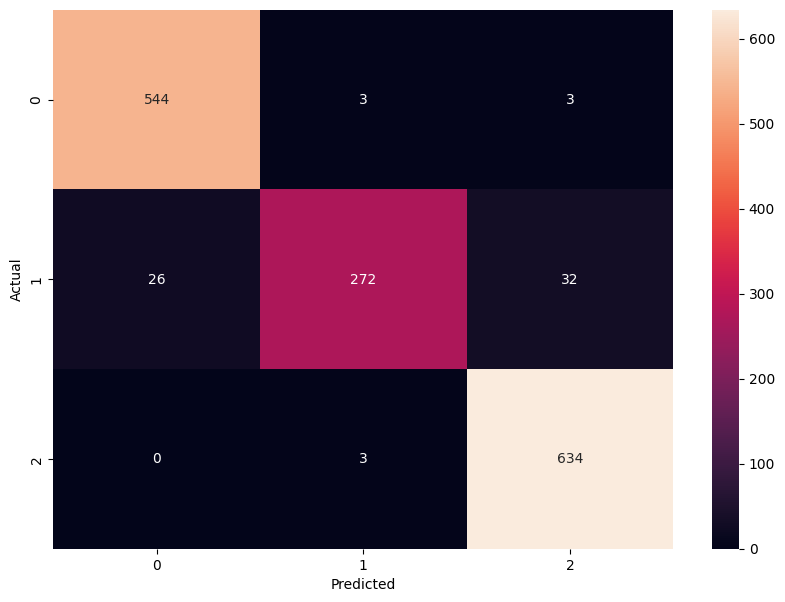

In [260]:
# confusion matrix

confusion_matrix(y_test, predictions)

# importing the packages for the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# example to push for github